# **Kaggle Setup**

In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set Kaggle API credentials if not already set
os.environ["KAGGLE_CONFIG_DIR"] = os.getcwd()

api = KaggleApi()
api.authenticate()

# Download dataset
dataset_name = "iabhishekofficial/mobile-price-classification"
api.dataset_download_files(dataset_name, path=os.getcwd(), unzip=True)

print("Dataset downloaded and extracted in:", os.getcwd())


👉 Import the os module to work with the operating system (e.g., handling paths and environment variables), and import KaggleApi from kaggle to interact with Kaggle programmatically.

👉 Set the environment variable KAGGLE_CONFIG_DIR to the current working directory. This ensures Kaggle API can find the kaggle.json credentials file if it exists in the current folder.

👉 Initialize the Kaggle API and authenticate using the credentials. Without authentication, we can’t programmatically access Kaggle datasets.

👉 Define the Kaggle dataset ID and instruct the API to download and unzip the dataset to the current working directory.

👉 Simple confirmation message showing where the dataset was downloaded and extracted.

It shows how the project ensures reproducibility — the dataset is fetched dynamically rather than requiring manual download.



# **Sagemaker Setup**

In [1]:
import sagemaker
from sklearn.model_selection import train_test_split
import boto3
import pandas as pd

sm_boto3 = boto3.client("sagemaker")
sess = sagemaker.Session()
region = sess.boto_session.region_name
bucket = 'mobsm2025' # Mention the created S3 bucket name here
print("Using bucket " + bucket)
print(region)

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\ladia\AppData\Local\sagemaker\sagemaker\config.yaml
Using bucket mobsm2025
us-east-1


👉 Imports the SageMaker Python SDK to interact with SageMaker services, scikit-learn utility for splitting data into training and testing sets, AWS SDK for Python to interact with other AWS services programmatically, pandas for data loading and manipulation.

👉 Created a Boto3 client specifically for the SageMaker service to make low-level API calls and sageMaker session object to manage interactions with SageMaker resource and also fetching the current AWS region being used in the SageMaker session.

👉 Specifies `bucket = 'mobsm2025'` the S3 bucket name where datasets and model artifacts will be stored.


# **Data Analysis**

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df['price_range'].value_counts(normalize=True)
#It shows the proportion (percentage) of each unique value in the column price_range.

price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df.isnull().mean()*100

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [9]:
features=list(df.columns)

In [10]:
label=features.pop(-1)

In [11]:
x=df[features]

In [12]:
y=df[label]

In [13]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [14]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [15]:
y.unique() # {0: 'Low_Risk',1: 'High_Risk'}

array([1, 2, 3, 0], dtype=int64)

In [16]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1700, 20)
(300, 20)
(1700,)
(300,)


In [19]:
trainX=pd.DataFrame(X_train)
trainX[label]=y_train

testX=pd.DataFrame(X_test)
testX[label]=y_test

In [20]:
print(trainX.shape)

(1700, 21)


In [21]:
print(testX.shape)

(300, 21)


In [22]:
trainX.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1452,1450,0,2.1,0,1,0,31,0.6,114,5,...,1573,1639,794,11,5,9,0,1,1,1
1044,1218,1,2.8,1,3,0,39,0.8,150,7,...,1122,1746,1667,10,0,12,0,0,0,1
1279,1602,0,0.6,0,12,0,58,0.4,170,1,...,1259,1746,3622,17,2,17,0,1,1,3
674,1034,0,2.6,1,2,1,45,0.3,190,3,...,182,1293,969,15,1,7,1,0,0,0
1200,530,0,2.4,0,1,0,32,0.3,88,6,...,48,1012,959,17,7,6,0,1,0,0


In [23]:
trainX.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [24]:
testX.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [25]:
trainX.to_csv("train-V-1.csv",index=False)

In [26]:
testX.to_csv("test-V-1.csv",index=False)

In [ ]:
# Defining S3 prefix (folder path) to organize training artifacts in S3
sk_prefix = "sagemaker/mobile_price_classification/sklearncontainer"

# Uploading training dataset to the specified S3 bucket and path
trainpath = sess.upload_data(
    path="train-V-1.csv", 
    bucket=bucket, 
    key_prefix=sk_prefix
)

# Uploading test dataset to the specified S3 bucket and path
testpath = sess.upload_data(
    path="test-V-1.csv", 
    bucket=bucket, 
    key_prefix=sk_prefix
)

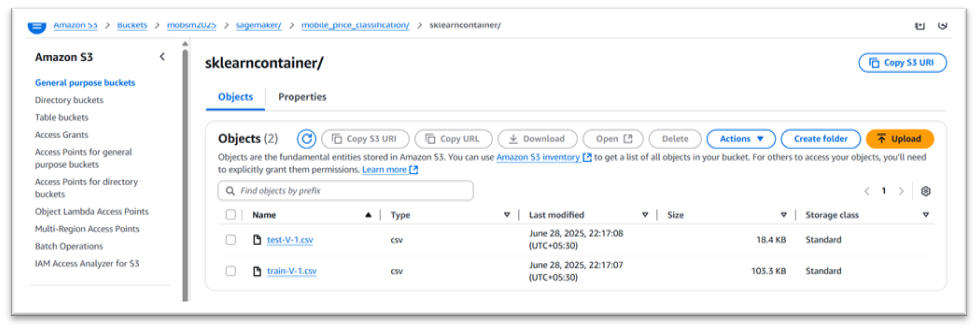

In [ ]:
print(trainpath,testpath,sep="\n")

s3://mob-sagemaker2025/sagemaker/mobile_price_classification/sklearncontainer/train-V-1.csv
s3://mob-sagemaker2025/sagemaker/mobile_price_classification/sklearncontainer/test-V-1.csv


In [ ]:
%%writefile script.py
# Here we are creating script.py, this script.py is available in sagemaker documentation, took copy from it
# changed libraries over here like random forest classifier

#the above line creates script.py and inside that it is going to have this entire code, it is available in our folder once block executed

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import sklearn
import joblib
import boto3
import pathlib
from io import StringIO 
import argparse
import joblib
import os
import numpy as np
import pandas as pd
    
def model_fn(model_dir):# this is to loading the model
    clf = joblib.load(os.path.join(model_dir, "model.joblib"))
    return clf
    
if __name__ == "__main__":
    # by default sagemaker require few args,
    print("[INFO] Extracting arguments")
    parser = argparse.ArgumentParser()

    # hyperparameters sent by the client are passed as command-line arguments to the script.
    parser.add_argument("--n_estimators", type=int, default=100)
    parser.add_argument("--random_state", type=int, default=0)

    # Data, model, and output directories
    parser.add_argument("--model-dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--train", type=str, default=os.environ.get("SM_CHANNEL_TRAIN"))
    parser.add_argument("--test", type=str, default=os.environ.get("SM_CHANNEL_TEST"))
    parser.add_argument("--train-file", type=str, default="train-V-1.csv")
    parser.add_argument("--test-file", type=str, default="test-V-1.csv")

    args, _ = parser.parse_known_args()
    
    print("SKLearn Version: ", sklearn.__version__)
    print("Joblib Version: ", joblib.__version__)

    print("[INFO] Reading data")
    print()
    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))
    
    features = list(train_df.columns)
    label = features.pop(-1)
    
    print("Building training and testing datasets")
    print()
    X_train = train_df[features]
    X_test = test_df[features]
    y_train = train_df[label]
    y_test = test_df[label]

    print('Column order: ')
    print(features)
    print()
    
    print("Label column is: ",label)
    print()
    
    print("Data Shape: ")
    print()
    print("---- SHAPE OF TRAINING DATA (85%) ----")
    print(X_train.shape)
    print(y_train.shape)
    print()
    print("---- SHAPE OF TESTING DATA (15%) ----")
    print(X_test.shape)
    print(y_test.shape)
    print()
    
  
    print("Training RandomForest Model.....")
    print()
    model =  RandomForestClassifier(n_estimators=args.n_estimators, random_state=args.random_state, verbose = 3,n_jobs=-1)
    model.fit(X_train, y_train)
    print()
    

    model_path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model,model_path)
    print("Model persisted at " + model_path)
    print()

    
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test,y_pred_test)
    test_rep = classification_report(y_test,y_pred_test)

    print()
    print("---- METRICS RESULTS FOR TESTING DATA ----")
    print()
    print("Total Rows are: ", X_test.shape[0])
    print('[TESTING] Model Accuracy is: ', test_acc)
    print('[TESTING] Testing Report: ')
    print(test_rep)

Overwriting script.py


👉 This script, script.py, defines the training and evaluation logic for a Random Forest classifier in SageMaker’s Scikit-learn framework.

👉It accepts hyperparameters and data locations via command-line arguments provided by SageMaker, then reads the training and test data from the mounted directories.

👉After splitting features and labels, it trains a RandomForestClassifier with configurable hyperparameters (n_estimators, random_state) and saves the trained model using joblib to the model_dir so SageMaker can deploy it later.

👉The script also prints out shapes, column details, and evaluation metrics like accuracy and classification report for quick reference.

👉Additionally, it includes a model_fn function to load the trained model when the SageMaker endpoint is serving predictions.

# **Job creation using sagemaker**

In [ ]:
from sagemaker.sklearn.estimator import SKLearn

# specify the scikit-learn container framework version supported by SageMaker
FRAMEWORK_VERSION = "0.23-1"

# defining the SageMaker SKLearn estimator with all configuration
sklearn_estimator = SKLearn(
    entry_point="script.py",  # path to our training script containing the Random Forest logic
    role="arn:aws:iam::182896147793:role/sgm",  # SageMaker execution role with permissions(check in documentation)
    instance_count=1,  # number of training instances (generally 1 for most basic jobs)
    instance_type="ml.m4.xlarge",  # training instance type (m4.xlarge is reasonably powerful and free-tier compatible)
    use_spot_instances=True,  # enable spot instances to reduce training costs
    framework_version=FRAMEWORK_VERSION,  # scikit-learn version supported by SageMaker
    base_job_name="RF-custom-sklearn",  # naming prefix for the SageMaker training job, you can customize if required
    hyperparameters={
        "n_estimators": 100,       # passes to script.py through argparse
        "random_state": 0,         # passes to script.py through argparse
    },
    max_wait=7200,  # maximum time to wait if spot capacity is not available (seconds)
    max_run=3600    # maximum time for actual training once resources are allocated (seconds)
)


👉 `use_spot_instances` → helps save costs by using spare AWS capacity

👉 `max_wait and max_run` → help manage timeouts and cost predictability

👉`entry_point` → points to your local script.py so SageMaker knows what code to execute

👉 `hyperparameters` → passed to the script as command-line arguments

👉 `base_job_name` → makes it easier to identify your training jobs in the SageMaker console



In [37]:
# launch training job, with asynchronous call
sklearn_estimator.fit({"train": trainpath, "test": testpath}, wait=True)
# sklearn_estimator.fit({"train": datapath}, wait=True)

# Here it is going to create training job with ansynchronous call( means goahead and create an instance)

INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: RF-custom-sklearn-2025-06-28-17-00-24-246


2025-06-28 17:00:29 Starting - Starting the training job...
2025-06-28 17:00:43 Starting - Preparing the instances for training...
2025-06-28 17:01:33 Downloading - Downloading the training image......
2025-06-28 17:02:44 Training - Training image download completed. Training in progress.
2025-06-28 17:02:44 Uploading - Uploading generated training model2025-06-28 17:02:35,049 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2025-06-28 17:02:35,053 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-28 17:02:35,108 sagemaker_sklearn_container.training INFO     Invoking user training script.
2025-06-28 17:02:35,270 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-28 17:02:35,284 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-28 17:02:35,300 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-

In [ ]:
# Wait for the SageMaker training job to finish
# logs="None" disables showing logs in the notebook, but still waits for completion
sklearn_estimator.latest_training_job.wait(logs="None")

# After training is complete, describe the training job to get the model artifact location
artifact = sm_boto3.describe_training_job(
    TrainingJobName=sklearn_estimator.latest_training_job.name
)["ModelArtifacts"]["S3ModelArtifacts"]

# Print out where the trained model artifact was saved in S3
print("Model artifact persisted at " + artifact)


2025-06-28 17:02:52 Starting - Preparing the instances for training
2025-06-28 17:02:52 Downloading - Downloading the training image
2025-06-28 17:02:52 Training - Training image download completed. Training in progress.
2025-06-28 17:02:52 Uploading - Uploading generated training model
2025-06-28 17:02:52 Completed - Training job completed
Model artifact persisted at s3://sagemaker-us-east-1-182896147793/RF-custom-sklearn-2025-06-28-17-00-24-246/output/model.tar.gz


👉 `latest_training_job.wait()` ensures the notebook pauses until the training completes, so you don’t accidentally deploy a model before it finishes.

👉 `describe_training_job` helps fetch the S3 URI of the trained model artifact, which you’ll need to deploy the model as an endpoint.

In [39]:
#shows where model saved
artifact

's3://sagemaker-us-east-1-182896147793/RF-custom-sklearn-2025-06-28-17-00-24-246/output/model.tar.gz'

In [ ]:
# creating custom model for endpoint activity
from sagemaker.sklearn.model import SKLearnModel
from time import gmtime, strftime

# Generate a unique model name using the current timestamp
model_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

# Create a SageMaker SKLearnModel object
model = SKLearnModel(
    name=model_name,                        # unique model name
    model_data=artifact,                    # S3 path to the trained model artifact
    role="arn:aws:iam::182896147793:role/sgm",  # execution role for deployment
    entry_point="script.py",                # the script that contains the model_fn() for loading the model
    framework_version=FRAMEWORK_VERSION,    # same scikit-learn version as training
)


SKLearnModel takes the trained model artifact and prepares it for deployment.

model_data specifies where SageMaker can find the saved model in S3.

entry_point ensures SageMaker uses your custom model_fn during inference.

Using a timestamp in model_name guarantees uniqueness, which is a best practice to avoid naming conflicts.

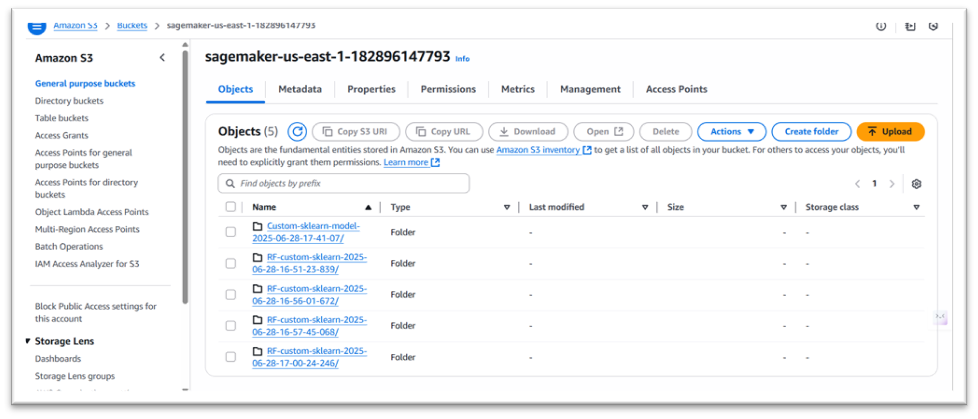

In [42]:
model_name

'Custom-sklearn-model-2025-06-28-17-41-07'

# **Cleanup Activities**
After completing your SageMaker workflow, it is important to clean up resources to avoid unnecessary AWS costs.

-> Delete the SageMaker Endpoint
Once you finish testing your deployed model, delete the endpoint to stop incurring instance charges:

In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set Kaggle API credentials if not already set
os.environ["KAGGLE_CONFIG_DIR"] = os.getcwd()

api = KaggleApi()
api.authenticate()

# Download dataset
dataset_name = "iabhishekofficial/mobile-price-classification"
api.dataset_download_files(dataset_name, path=os.getcwd(), unzip=True)

print("Dataset downloaded and extracted in:", os.getcwd())


In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set Kaggle API credentials if not already set
os.environ["KAGGLE_CONFIG_DIR"] = os.getcwd()

api = KaggleApi()
api.authenticate()

# Download dataset
dataset_name = "iabhishekofficial/mobile-price-classification"
api.dataset_download_files(dataset_name, path=os.getcwd(), unzip=True)

print("Dataset downloaded and extracted in:", os.getcwd())

In [ ]:
import sagemaker
from sklearn.model_selection import train_test_split
import boto3
import pandas as pd

sm_boto3 = boto3.client("sagemaker")
sess = sagemaker.Session()
region = sess.boto_session.region_name
bucket = 'mobsm2025' # Mention the created S3 bucket name here
print("Using bucket " + bucket)
print(region)

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\ladia\AppData\Local\sagemaker\sagemaker\config.yaml
Using bucket mobsm2025
us-east-1


In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df['price_range'].value_counts(normalize=True)
#It shows the proportion (percentage) of each unique value in the column price_range.

price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.isnull().mean()*100

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [ ]:
features=list(df.columns)

In [ ]:
label=features.pop(-1)

In [ ]:
x=df[features]

In [ ]:
y=df[label]

In [ ]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [ ]:
y.unique() # {0: 'Low_Risk',1: 'High_Risk'}

array([1, 2, 3, 0], dtype=int64)

In [ ]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1700, 20)
(300, 20)
(1700,)
(300,)


In [ ]:
trainX=pd.DataFrame(X_train)
trainX[label]=y_train

testX=pd.DataFrame(X_test)
testX[label]=y_test

In [ ]:
print(trainX.shape)

(1700, 21)


In [ ]:
print(testX.shape)

(300, 21)


In [ ]:
trainX.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1452,1450,0,2.1,0,1,0,31,0.6,114,5,...,1573,1639,794,11,5,9,0,1,1,1
1044,1218,1,2.8,1,3,0,39,0.8,150,7,...,1122,1746,1667,10,0,12,0,0,0,1
1279,1602,0,0.6,0,12,0,58,0.4,170,1,...,1259,1746,3622,17,2,17,0,1,1,3
674,1034,0,2.6,1,2,1,45,0.3,190,3,...,182,1293,969,15,1,7,1,0,0,0
1200,530,0,2.4,0,1,0,32,0.3,88,6,...,48,1012,959,17,7,6,0,1,0,0


In [ ]:
trainX.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
testX.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
trainX.to_csv("train-V-1.csv",index=False)

In [ ]:
testX.to_csv("test-V-1.csv",index=False)

In [ ]:
# Defining S3 prefix (folder path) to organize training artifacts in S3
sk_prefix = "sagemaker/mobile_price_classification/sklearncontainer"

# Uploading training dataset to the specified S3 bucket and path
trainpath = sess.upload_data(
    path="train-V-1.csv", 
    bucket=bucket, 
    key_prefix=sk_prefix
)

# Uploading test dataset to the specified S3 bucket and path
testpath = sess.upload_data(
    path="test-V-1.csv", 
    bucket=bucket, 
    key_prefix=sk_prefix
)

In [ ]:
print(trainpath,testpath,sep="\n")

s3://mob-sagemaker2025/sagemaker/mobile_price_classification/sklearncontainer/train-V-1.csv
s3://mob-sagemaker2025/sagemaker/mobile_price_classification/sklearncontainer/test-V-1.csv


In [ ]:
%%writefile script.py
# Here we are creating script.py, this script.py is available in sagemaker documentation, took copy from it
# changed libraries over here like random forest classifier

#the above line creates script.py and inside that it is going to have this entire code, it is available in our folder once block executed

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import sklearn
import joblib
import boto3
import pathlib
from io import StringIO 
import argparse
import joblib
import os
import numpy as np
import pandas as pd
    
def model_fn(model_dir):# this is to loading the model
    clf = joblib.load(os.path.join(model_dir, "model.joblib"))
    return clf
    
if __name__ == "__main__":
    # by default sagemaker require few args,
    print("[INFO] Extracting arguments")
    parser = argparse.ArgumentParser()

    # hyperparameters sent by the client are passed as command-line arguments to the script.
    parser.add_argument("--n_estimators", type=int, default=100)
    parser.add_argument("--random_state", type=int, default=0)

    # Data, model, and output directories
    parser.add_argument("--model-dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--train", type=str, default=os.environ.get("SM_CHANNEL_TRAIN"))
    parser.add_argument("--test", type=str, default=os.environ.get("SM_CHANNEL_TEST"))
    parser.add_argument("--train-file", type=str, default="train-V-1.csv")
    parser.add_argument("--test-file", type=str, default="test-V-1.csv")

    args, _ = parser.parse_known_args()
    
    print("SKLearn Version: ", sklearn.__version__)
    print("Joblib Version: ", joblib.__version__)

    print("[INFO] Reading data")
    print()
    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))
    
    features = list(train_df.columns)
    label = features.pop(-1)
    
    print("Building training and testing datasets")
    print()
    X_train = train_df[features]
    X_test = test_df[features]
    y_train = train_df[label]
    y_test = test_df[label]

    print('Column order: ')
    print(features)
    print()
    
    print("Label column is: ",label)
    print()
    
    print("Data Shape: ")
    print()
    print("---- SHAPE OF TRAINING DATA (85%) ----")
    print(X_train.shape)
    print(y_train.shape)
    print()
    print("---- SHAPE OF TESTING DATA (15%) ----")
    print(X_test.shape)
    print(y_test.shape)
    print()
    
  
    print("Training RandomForest Model.....")
    print()
    model =  RandomForestClassifier(n_estimators=args.n_estimators, random_state=args.random_state, verbose = 3,n_jobs=-1)
    model.fit(X_train, y_train)
    print()
    

    model_path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model,model_path)
    print("Model persisted at " + model_path)
    print()

    
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test,y_pred_test)
    test_rep = classification_report(y_test,y_pred_test)

    print()
    print("---- METRICS RESULTS FOR TESTING DATA ----")
    print()
    print("Total Rows are: ", X_test.shape[0])
    print('[TESTING] Model Accuracy is: ', test_acc)
    print('[TESTING] Testing Report: ')
    print(test_rep)

Overwriting script.py


In [ ]:
from sagemaker.sklearn.estimator import SKLearn

# specify the scikit-learn container framework version supported by SageMaker
FRAMEWORK_VERSION = "0.23-1"

# defining the SageMaker SKLearn estimator with all configuration
sklearn_estimator = SKLearn(
    entry_point="script.py",  # path to our training script containing the Random Forest logic
    role="arn:aws:iam::182896147793:role/sgm",  # SageMaker execution role with permissions(check in documentation)
    instance_count=1,  # number of training instances (generally 1 for most basic jobs)
    instance_type="ml.m4.xlarge",  # training instance type (m4.xlarge is reasonably powerful and free-tier compatible)
    use_spot_instances=True,  # enable spot instances to reduce training costs
    framework_version=FRAMEWORK_VERSION,  # scikit-learn version supported by SageMaker
    base_job_name="RF-custom-sklearn",  # naming prefix for the SageMaker training job, you can customize if required
    hyperparameters={
        "n_estimators": 100,       # passes to script.py through argparse
        "random_state": 0,         # passes to script.py through argparse
    },
    max_wait=7200,  # maximum time to wait if spot capacity is not available (seconds)
    max_run=3600    # maximum time for actual training once resources are allocated (seconds)
)


In [ ]:
# launch training job, with asynchronous call
sklearn_estimator.fit({"train": trainpath, "test": testpath}, wait=True)
# sklearn_estimator.fit({"train": datapath}, wait=True)

# Here it is going to create training job with ansynchronous call( means goahead and create an instance)

INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: RF-custom-sklearn-2025-06-28-17-00-24-246


2025-06-28 17:00:29 Starting - Starting the training job...
2025-06-28 17:00:43 Starting - Preparing the instances for training...
2025-06-28 17:01:33 Downloading - Downloading the training image......
2025-06-28 17:02:44 Training - Training image download completed. Training in progress.
2025-06-28 17:02:44 Uploading - Uploading generated training model2025-06-28 17:02:35,049 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2025-06-28 17:02:35,053 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-28 17:02:35,108 sagemaker_sklearn_container.training INFO     Invoking user training script.
2025-06-28 17:02:35,270 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-28 17:02:35,284 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-06-28 17:02:35,300 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-

In [ ]:
# Wait for the SageMaker training job to finish
# logs="None" disables showing logs in the notebook, but still waits for completion
sklearn_estimator.latest_training_job.wait(logs="None")

# After training is complete, describe the training job to get the model artifact location
artifact = sm_boto3.describe_training_job(
    TrainingJobName=sklearn_estimator.latest_training_job.name
)["ModelArtifacts"]["S3ModelArtifacts"]

# Print out where the trained model artifact was saved in S3
print("Model artifact persisted at " + artifact)


2025-06-28 17:02:52 Starting - Preparing the instances for training
2025-06-28 17:02:52 Downloading - Downloading the training image
2025-06-28 17:02:52 Training - Training image download completed. Training in progress.
2025-06-28 17:02:52 Uploading - Uploading generated training model
2025-06-28 17:02:52 Completed - Training job completed
Model artifact persisted at s3://sagemaker-us-east-1-182896147793/RF-custom-sklearn-2025-06-28-17-00-24-246/output/model.tar.gz


In [ ]:
#shows where model saved
artifact

's3://sagemaker-us-east-1-182896147793/RF-custom-sklearn-2025-06-28-17-00-24-246/output/model.tar.gz'

In [ ]:
# creating custom model for endpoint activity
from sagemaker.sklearn.model import SKLearnModel
from time import gmtime, strftime

# Generate a unique model name using the current timestamp
model_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

# Create a SageMaker SKLearnModel object
model = SKLearnModel(
    name=model_name,                        # unique model name
    model_data=artifact,                    # S3 path to the trained model artifact
    role="arn:aws:iam::182896147793:role/sgm",  # execution role for deployment
    entry_point="script.py",                # the script that contains the model_fn() for loading the model
    framework_version=FRAMEWORK_VERSION,    # same scikit-learn version as training
)


In [ ]:
model_name

'Custom-sklearn-model-2025-06-28-17-41-07'

In [ ]:
## Endpoints deployment

# Create a unique endpoint name using current timestamp
endpoint_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("EndpointName={}".format(endpoint_name))

# Deploy the model to a SageMaker endpoint
predictor = model.deploy(
    initial_instance_count=1,        # deploy with a single instance
    instance_type="ml.m4.xlarge",    # instance type for serving predictions
    endpoint_name=endpoint_name,     # name of the endpoint
)


EndpointName=Custom-sklearn-model-2025-06-28-17-42-13


INFO:sagemaker:Creating model with name: Custom-sklearn-model-2025-06-28-17-41-07
INFO:sagemaker:Creating endpoint-config with name Custom-sklearn-model-2025-06-28-17-42-13
INFO:sagemaker:Creating endpoint with name Custom-sklearn-model-2025-06-28-17-42-13


-------!

In [ ]:
endpoint_name

'Custom-sklearn-model-2025-06-28-17-42-13'

In [ ]:
#sample data to test prediction
testX[features][0:2].values.tolist()

[[1454.0,
  1.0,
  0.5,
  1.0,
  1.0,
  0.0,
  34.0,
  0.7,
  83.0,
  4.0,
  3.0,
  250.0,
  1033.0,
  3419.0,
  7.0,
  5.0,
  5.0,
  1.0,
  1.0,
  0.0],
 [1092.0,
  1.0,
  0.5,
  1.0,
  10.0,
  0.0,
  11.0,
  0.5,
  167.0,
  3.0,
  14.0,
  468.0,
  571.0,
  737.0,
  14.0,
  4.0,
  11.0,
  0.0,
  1.0,
  0.0]]

In [ ]:
# Make predictions on the first 2 test samples
# testX[features][0:2].values.tolist() converts the first two rows into a list of lists (required by the predictor)
print(predictor.predict(testX[features][0:2].values.tolist()))  # predicts output


[3 0]


In [ ]:
# Delete the endpoint after testing to avoid incurring ongoing costs
sm_boto3.delete_endpoint(EndpointName=endpoint_name)

{'ResponseMetadata': {'RequestId': '92d5a860-371f-446e-a876-8168722090ab',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '92d5a860-371f-446e-a876-8168722090ab',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Sat, 28 Jun 2025 17:48:28 GMT',
   'content-length': '0'},
  'RetryAttempts': 0}}

## SageMaker Endpoint:

An Amazon SageMaker endpoint is a fully managed service that hosts a trained machine learning model to provide real-time predictions through a RESTful API.

Once deployed, the endpoint can be called by applications to make inference requests at scale, without worrying about the infrastructure behind it.

SageMaker handles the scaling, monitoring, and management of these endpoints so you can focus on delivering predictions to your users.

In [ ]:
## Endpoints deployment

# Create a unique endpoint name using current timestamp
endpoint_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("EndpointName={}".format(endpoint_name))

# Deploy the model to a SageMaker endpoint
predictor = model.deploy(
    initial_instance_count=1,        # deploy with a single instance
    instance_type="ml.m4.xlarge",    # instance type for serving predictions
    endpoint_name=endpoint_name,     # name of the endpoint
)


EndpointName=Custom-sklearn-model-2025-06-28-17-42-13


INFO:sagemaker:Creating model with name: Custom-sklearn-model-2025-06-28-17-41-07
INFO:sagemaker:Creating endpoint-config with name Custom-sklearn-model-2025-06-28-17-42-13
INFO:sagemaker:Creating endpoint with name Custom-sklearn-model-2025-06-28-17-42-13


-------!

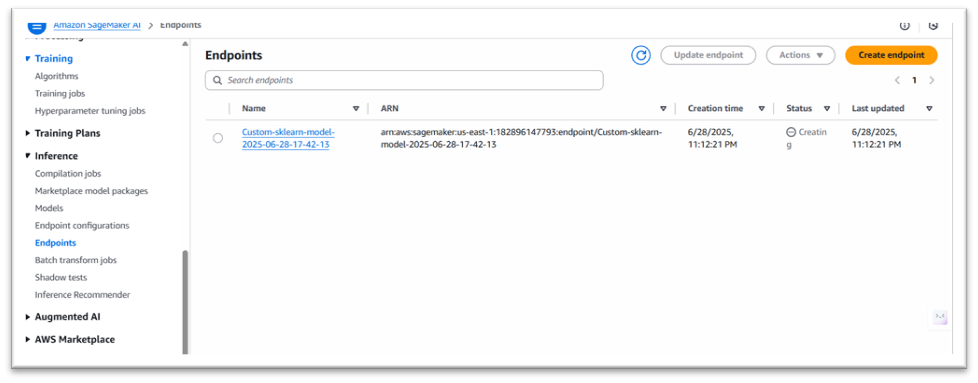

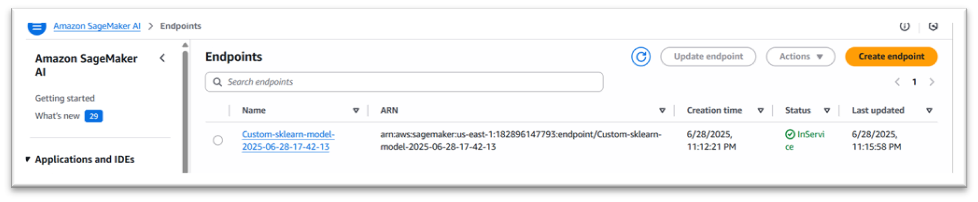

In [44]:
endpoint_name

'Custom-sklearn-model-2025-06-28-17-42-13'

In [ ]:
#sample data to test prediction
testX[features][0:2].values.tolist()

[[1454.0,
  1.0,
  0.5,
  1.0,
  1.0,
  0.0,
  34.0,
  0.7,
  83.0,
  4.0,
  3.0,
  250.0,
  1033.0,
  3419.0,
  7.0,
  5.0,
  5.0,
  1.0,
  1.0,
  0.0],
 [1092.0,
  1.0,
  0.5,
  1.0,
  10.0,
  0.0,
  11.0,
  0.5,
  167.0,
  3.0,
  14.0,
  468.0,
  571.0,
  737.0,
  14.0,
  4.0,
  11.0,
  0.0,
  1.0,
  0.0]]

In [ ]:
# Make predictions on the first 2 test samples
# testX[features][0:2].values.tolist() converts the first two rows into a list of lists (required by the predictor)
print(predictor.predict(testX[features][0:2].values.tolist()))  # predicts output


[3 0]


The .tolist() is necessary because the predictor expects a JSON-serializable list, not a DataFrame.

In [ ]:
# Delete the endpoint after testing to avoid incurring ongoing costs
sm_boto3.delete_endpoint(EndpointName=endpoint_name)

{'ResponseMetadata': {'RequestId': '92d5a860-371f-446e-a876-8168722090ab',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '92d5a860-371f-446e-a876-8168722090ab',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Sat, 28 Jun 2025 17:48:28 GMT',
   'content-length': '0'},
  'RetryAttempts': 0}}

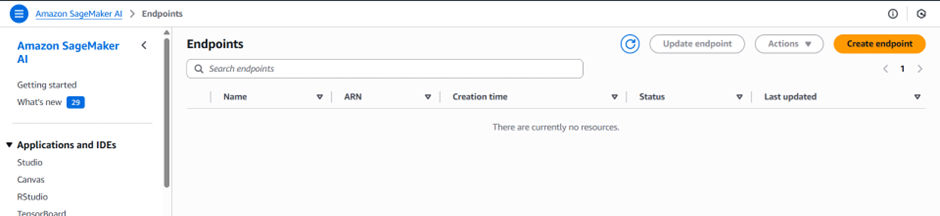

## Delete the S3 Bucket (if no longer needed)
You can remove the entire S3 bucket (make sure no other resources depend on it):

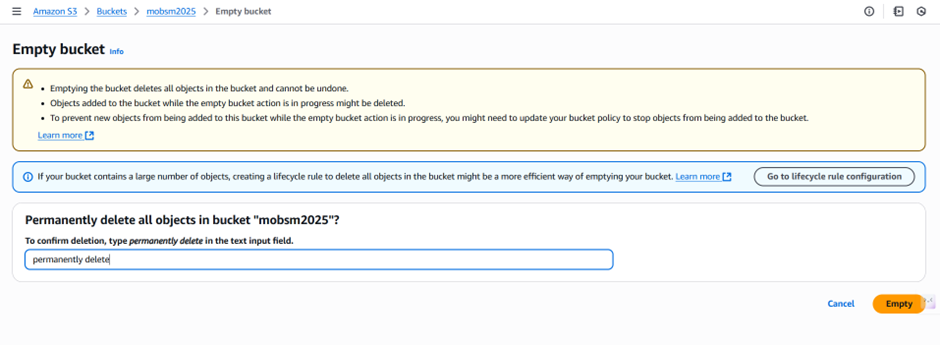

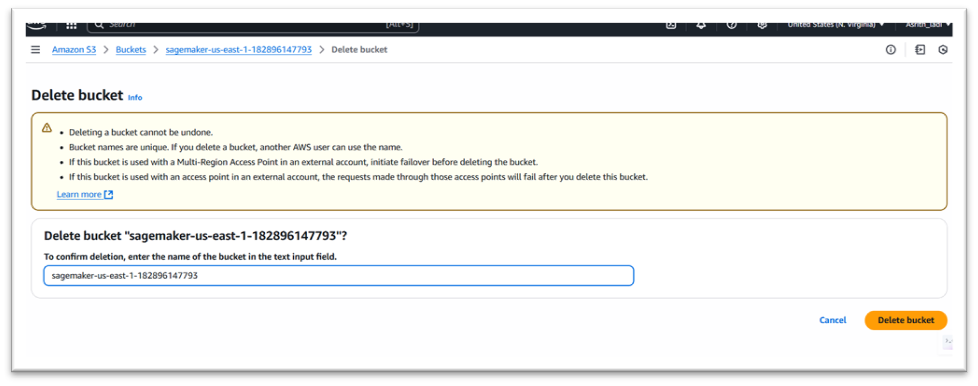

✅ This ensures a clean shutdown of resources and helps manage AWS billing effectively.